<h1 style="text-align:center;font-size:200%;;">FINANCIAL ANALYSIS📊</h1> 

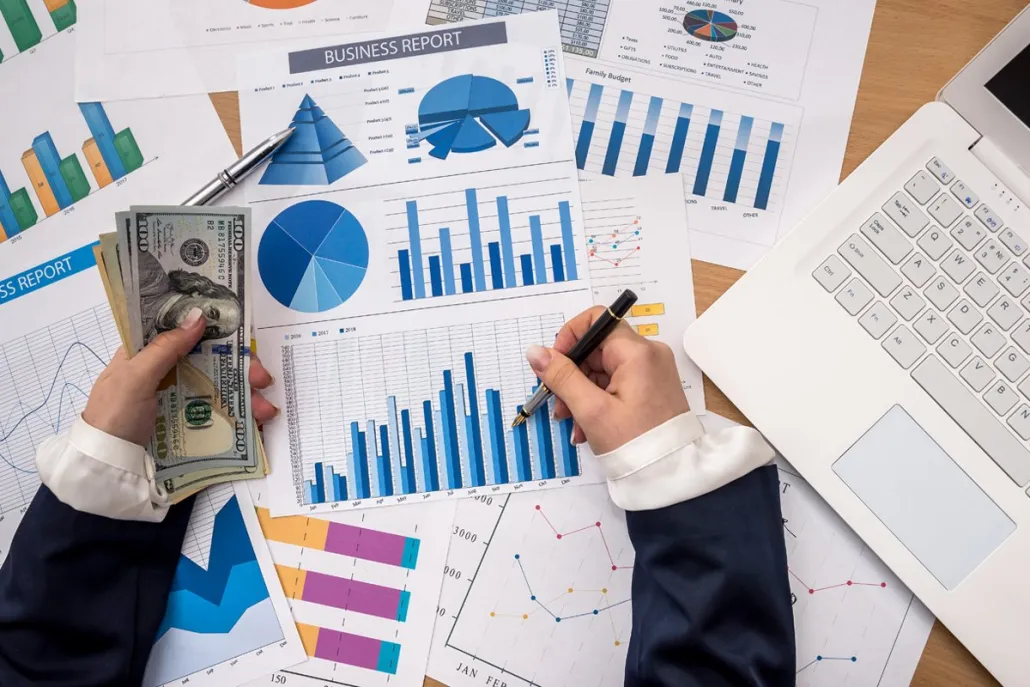

<a class="anchor" id="0.1"></a>
# **Table of Contents**
1. [Glance of Analysis](#1)
2. [Import libraries & Data](#2)
3. [Basic Analysis](#3)
  - [Description of Data & functions](#3.1) 
  - [Graphical Representation](#3.2)
  - [Bivariate Analysis](#3.3)
  - [correlation between numeric variable](#3.4)
  - [Missing Value Treatment](#3.5)
  - [Outliers Treatment](#3.6)
  - [Dummy Creation](#3.7)
4. [Model Development](#4)
  - [Data Spliting](#4.1)
  - [Data Balancing](#4.2)
5. [Model Deployment](#5)
  - [logistic Regression](#5.1)
6. [Model Review](#6)
  -[confusion Tree](#6.1)
7.[summary](#7)
 

## Glance of Analysis <a class="anchor" id="1"></a>
[Table of content](#0.1)



In this project, we will understand how banks and other financial institutions use predictive analytics for modeling their risk. Risk analytics has attracted a lot of attention in the wake of the recent financial crisis. With the help of risk analytics, we can answer questions such as, “Can the banks predict when their loans would default?”, “Can the banks estimate the aggregate default rate”, “What aggregate tools can be used in this pursuit?”, etc. In this project, we will understand two very important concepts in the field of banking which are market risk and credit risk. Going ahead, we will also understand how can we predict and prevent fraudulent transactions. The focusing area of this project is to detect the Defaulter & creditor
by predecting defaulter banks can easily make policies according to them .In short This project will help banks to lesser the Risk of Defaulter.  



## Import Libraries & Data <a class="anchor" id="2"></a>
[Table of content](#0.1)

In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir("E:\data")



## Basic Analysis<a class="anchor" id="3"></a>
[Table of content](#0.1)

In [3]:
Default=pd.read_csv("Default.csv")

## Description of Data & Functions <a class="anchor" id="3.1"></a>


VARIABLES :-

Default :=>  Failure to perform a task or fulfill an obligation, especially failure to meet a financial obligation: in default              on a loan

Student:=>   Denoting someone who is studying in order to enter a particular profession

Balance:=>   According to this data balance means the remaining amount of per month.

Income:=>     According to this data Income means the profitable amount of per month.

**Our Focusing area in this Data is to Detacting Defaulter So, our Target Variable is Default**.


In [4]:
Default.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


In [5]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


According to above information , We have two categorical variable (default , student) & two non numerical variable( balance, Income)

In [6]:
Default.shape

(10000, 4)

 Above cell tells that we have Rows =10000  & columns = 4 
 
 We have 10000 people out of these we have to find out how many will return the loan to banks

In [7]:
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


 According to Above information data will giving some important point like :-
 
This description is telling the information of whole data and pointing out individual.

Maxium outstanding balance of a person = 2654 & Income = 73554

midean  outstanding balance of person  = 823 & Income = 34552

Minimum  outstanding balance of person = 0 & Income i= 771

Average outstanding  balance of data =835 & Income = 33516

By using above information we will also findout the Inter Quartile Range that will also help to detect defaul Furter we will do this.

## Graphical Representation  <a class="anchor" id="3.2"></a> 
[Table of content](#0.1)

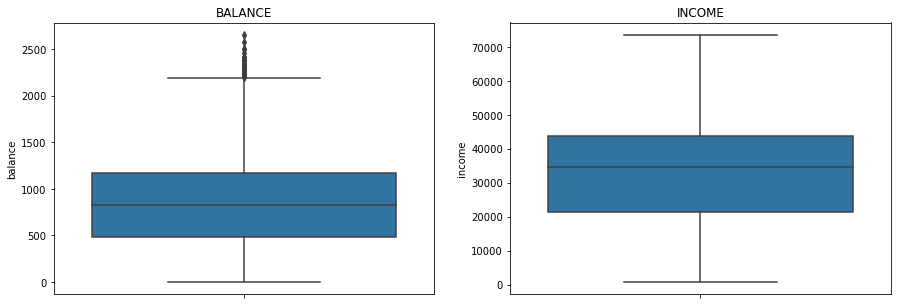

In [8]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y = Default['balance'])
plt.title("BALANCE")

plt.subplot(1,2,2)
sns.boxplot(y = Default['income'])
plt.title ("INCOME")
plt.show()

Above Graphical daigram is showing numerical data ,According to this data we have few outliers in balance side .so we will treat them further & our income side data was normal.

It means that persons income is good but the EMI of per month is pending in terms of balance so, the default payment period is short duration type. 

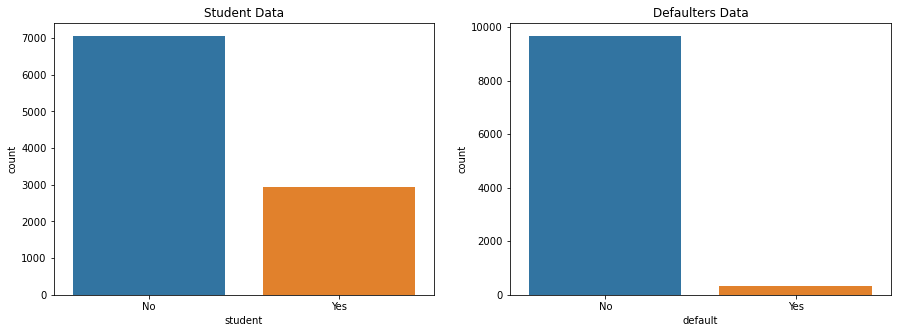

In [9]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(Default['student'])
plt.title("Student Data")

plt.subplot(1,2,2)
sns.countplot(Default['default'])
plt.title("Defaulters Data")
plt.show()

Above Graphical daigram is showing categorical data .

Acoording to student data we saw that About 7000 person were not a student who taken the loan so might be possible they are working professional & 3000 approx were student .

In defaulters columns it is showing that about 9600 person where not a defaulter and 350 aprox were defaulter.
As we see that their are very few number of defaulters in our data about 350 /10000  

In [10]:
Default["student"].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

This is showing that out of 10000 record 7056 person were taken loan  & rest of them wre student (2944)


In [11]:
Default["default"].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

According to above columns person who  were not in a defaulters line = 9667
and person who were actually in a defaulters line = 333
 
so, according to target variable we have to focus on these 333 people only 

In [12]:
Default["student"].value_counts(normalize=True).round(2)

No     0.71
Yes    0.29
Name: student, dtype: float64

we converted student data into percentage.

71% of individual were working proffesional & taken loan

29% of individual were students.

In [13]:
Default["default"].value_counts(normalize = True).round(2)

No     0.97
Yes    0.03
Name: default, dtype: float64

we converted data into percentage:

97% of individual were belong to non defaulters category

3% of individual were belong to  defaulters category

## Bivariate <a class="anchor" id="3.3"></a>
[Table of content](#0.1)

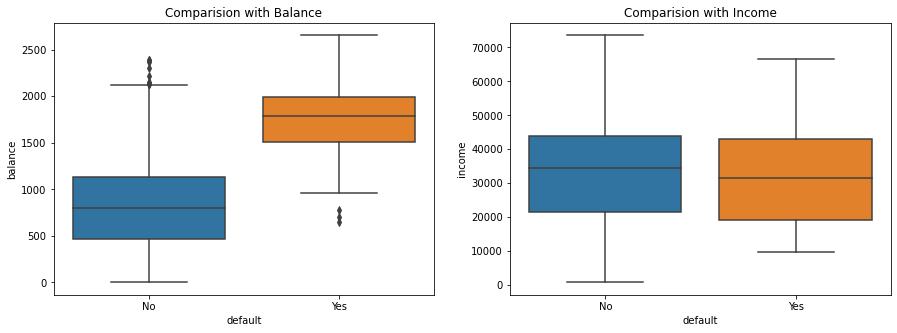

In [14]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(Default['default'], Default['balance'])
plt.title("Comparision with Balance")

plt.subplot(1,2,2)
sns.boxplot(Default['default'], Default['income'])
plt.title("Comparision with Income")
plt.show()

In [15]:
pd.crosstab(Default['student'], Default['default'], normalize = 'index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


Above matrix tell:-

student which are not defaulters = 96% & 4% were defaulters

working proffesional which are not defaulters =97% & 3% were defaulters. 

## Correlation between numerical variable. <a class="anchor" id="3.4"></a>
[Table of content](#0.1)

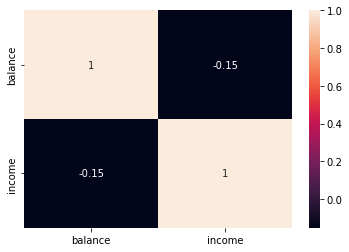

In [16]:
sns.heatmap(Default[['balance', 'income']].corr(), annot = True)
plt.show()

This data is telling that relationship betwen variable is not so good .It is telling if one will increase by 1% so, other will go down by 0.15%

## Missing Value Treatment  <a class="anchor" id="3.5"></a>
[Table of content](#0.1)

In [17]:
Default.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

 we don't have missing value in this data so we will not performing missing value treatment.

## Outlier Treatment <a class="anchor" id="3.6"></a>
[Table of content](#0.1)

In [18]:
Q1, Q3 = Default['balance'].quantile([.25, .75])
IQR = Q3 - Q1 #Q3=75% , Q1 =25% 
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

IN Above cell we are finding out the interquartile range .

In [19]:
UL

2193.16375

This is upper limit above this all are outlier

In [20]:
LL

-545.1262500000001

This is lower limit below this all are outlier 

In [21]:
df = Default[Default['balance'] > UL]

Extracting all outlier which are above upper limit 

In [22]:
df

,default,student,balance,income
173,Yes,Yes,2205.80,14271.49
1136,Yes,No,2499.02,51504.29
1160,Yes,Yes,2502.68,14947.52
1359,Yes,No,2220.97,40725.10
1502,Yes,Yes,2332.88,11770.23
1609,Yes,Yes,2269.95,18021.11
2096,Yes,Yes,2261.85,20030.17
2140,No,Yes,2308.89,19110.27
2929,Yes,Yes,2387.31,28296.91
3162,Yes,Yes,2415.32,17429.50


In [23]:
df['default'].count()

31

Above cell is telling that only 31 individual were defaulting the loan EMI

In [24]:
df['default'].value_counts(normalize = True).round(2)

Yes    0.84
No     0.16
Name: default, dtype: float64

Above cell is telling that 83% of outliers were defauters.& 16% were not defaulters ,:But in our original data we found that only 3% of our data has defaulters ,

It means majuority of defaulters were cominig from outliers category

In [25]:
df['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

Above cell is telling no. of defaulters in outliers=26 & and non defaulters=5 . 

In [26]:
Default['balance'] = np.where(Default['balance'] > UL, UL, Default['balance'] )

Converting outliers into upper limit for balancing data.

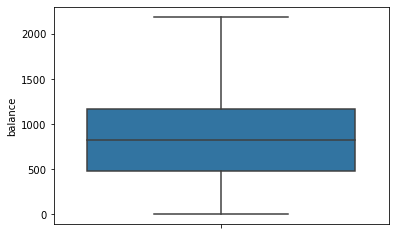

In [27]:
sns.boxplot(y = Default['balance'])
plt.show()

outlier treatment was done .

## Dummy creation <a class="anchor" id="3.7"></a>
[Table of content](#0.1)

In [28]:
Default = pd.get_dummies(Default, drop_first = True)

In [29]:
Default.head()

,balance,income,default_Yes,student_Yes
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0


Dummy value was created in this we consider 0 =No & 1 = Yes

In [30]:
Default.columns = ['balance', 'income', 'default', 'student']

In [31]:
Default.head()

,balance,income,default,student
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0


# Model Development <a class="anchor" id="4"></a>
[Table of content](#0.1)

## Data spliting into x & y <a class="anchor" id="4.1"></a>
[Table of content](#0.1)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = Default.drop('default', axis = 1)
y = Default['default']

X is our independent variables

Y is our Dependent Variable 

Target variable is dependent variable.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)

spliting data into training and testing of data

Acoording to above code we are spliting data into 70:30 means :70% were in train,.& 30% were in test section.

Becuse this data is highly imbalance and could be possibly result into different ratio in Y variable between train & test.



In [35]:
print(X_train.shape)
print(X_test.shape)

(7000, 3)
(3000, 3)


In [36]:
print(y_train.value_counts(normalize = True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))

0    0.97
1    0.03
Name: default, dtype: float64
 
0    0.97
1    0.03
Name: default, dtype: float64


97:3 is highly imbalance data .   non defaulters =97 & defaulters =3

## Data Balancing <a class="anchor" id="4.2"></a>
[Table of content](#0.1)

**Treating target imbalance using SMOTE**

In [37]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33, sampling_strategy = 0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)

Resampling data into x_res,y_res after balancing it.

In [38]:
print(X_res.shape)
print(y_res.shape)

(11842, 3)
(11842,)


## Model deployment <a class="anchor" id="5"></a>
[Table of content](#0.1)

### Logistic Regression <a class="anchor" id="5.1"></a>
[Table of content](#0.1)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression()

In [41]:
lr.fit(X_res,y_res)#fited by train

LogisticRegression()

In [42]:
y_pred=lr.predict(X_test)#predicted by test

## Accuracy of  model <a class="anchor" id="6"></a>
[Table of content](#0.1)

### confusion matrics <a class="anchor" id="6.1"></a>
[Table of content](#0.1)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
confusion_matrix(y_test,y_pred) #acctual value into y test & predicted value into ypred

array([[2589,  311],
       [  25,   75]], dtype=int64)

In [45]:
(2589+75)/(2589+75+25+311)

0.888

IT means our accuracy of fraud detection is 88%

## Summary <a class="anchor" id="7"></a>
[Table of content](#0.1)

Default detection is a very crusial step in financial risk management . By Identification of defaulters we can save lot of time ,man power etc. This whole activity will help us to identifying the focusing area in term of fraud/default detection  problem of loan crises as a result default in th payment agreement caving undue delay in payment and possible loss. In the banking industry , problem are often in heritable consequence lending through suppress profit while supportive leading the possibility of default 

The objectives of this research , the scope of the study will be defined to embody all relevent aspect of loan and default in banking operations .The different type of loans, frequency, amount,involve ,measure of loss to banks , cause level of effectiveness and preventive measure.